<a href="https://colab.research.google.com/github/Skula33/FDSfE_SKulakowski/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
re_df = pd.read_csv('https://raw.githubusercontent.com/fedhere/FDSfE_FBianco/main/data/Real_estate.csv')

# First Looks:

In [55]:
re_df.head()

,transaction_date,house_age,distance_nearest_MRT_station,convenience_stores,house_price_unit_area,log_distance_nearest_mrt_station
0,2012.917,32.0,84.87882,10,37.9,1.928799
1,2012.917,19.5,306.59470,9,42.2,2.486565
2,2013.583,13.3,561.98450,5,47.3,2.749724
3,2013.500,13.3,561.98450,5,54.8,2.749724
4,2012.833,5.0,390.56840,5,43.1,2.591697


In [56]:
re_df.describe()

,transaction_date,house_age,distance_nearest_MRT_station,convenience_stores,house_price_unit_area,log_distance_nearest_mrt_station
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,37.980193,2.775885
std,0.281967,11.392485,1262.109595,2.945562,13.606488,0.486284
min,2012.667000,0.000000,23.382840,0.000000,7.600000,1.368897
25%,2012.917000,9.025000,289.324800,1.000000,27.700000,2.461386
50%,2013.167000,16.100000,492.231300,4.000000,38.450000,2.692169
75%,2013.417000,28.150000,1454.279000,6.000000,46.600000,3.162647
max,2013.583000,43.800000,6488.021000,10.000000,117.500000,3.812112


# Simple Linear Regression:

In [32]:
re_df['log_distance_nearest_mrt_station'] = np.log10(re_df['distance_nearest_MRT_station'])

In [39]:
feature_std = (re_df['log_distance_nearest_mrt_station'] - re_df['log_distance_nearest_mrt_station'].mean()) / re_df['log_distance_nearest_mrt_station'].std()
target_std = (re_df['house_price_unit_area'] - re_df['house_price_unit_area'].mean()) / re_df['house_price_unit_area'].std()

In [40]:
lm1 = LinearRegression()

In [41]:
lm1.fit(np.array(feature_std).reshape(-1,1), target_std)
pred = lm1.predict(np.array(feature_std).reshape(-1,1))
# Calculating r2 and adj-r2
r2 = lm1.score(np.array(feature_std).reshape(-1,1), target_std)
adj_r2 = 1-(1-r2)*(len(feature_std)-1)/(len(feature_std)-1-1)

In [42]:
print('r2 = {0:.3f}'.format(r2))
print('adjusted-r2 = {0:.3f}'.format(adj_r2))

r2 = 0.539
adjusted-r2 = 0.538


In [43]:
print('coefficient = {0:.3f}'.format(lm1.coef_[0]))

coefficient = -0.734


What does this coefficient tell us about our dataset? Well essentially we can conclude that for every unit increase in the log-linear representation of the distance to the nearest MRT station the house price per unit area would decrease by 0.734 which is 10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared.

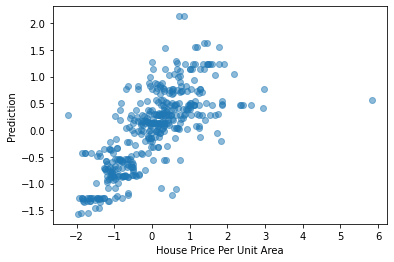

In [54]:
ax = plt.scatter(target_std, pred, alpha = 0.5);
plt.xlabel('House Price Per Unit Area');
plt.ylabel('Prediction');

# Multiple Linear Regression

In [57]:
# I'm gonna re-read in the data so i can write less code in normalizing the data
re_df = pd.read_csv('https://raw.githubusercontent.com/fedhere/FDSfE_FBianco/main/data/Real_estate.csv')
re_df['log_distance_nearest_mrt_station'] = np.log10(re_df['distance_nearest_MRT_station'])

In [58]:
for i in re_df.columns:
  re_df[i] = (re_df[i] - re_df[i].mean()) / re_df[i].std()

In [59]:
lm2 = LinearRegression()

In [60]:
features2 = re_df[['log_distance_nearest_mrt_station', 'convenience_stores', 'transaction_date', 'house_age']]
target = re_df['house_price_unit_area']

In [61]:
lm2.fit(features2, target)

LinearRegression()

In [66]:
print('coefficient for log_distance_nearset_mrt_station = {0:.3f}'.format(lm2.coef_[0]))
print('coefficient for convenience_stores = {0:.3f}'.format(lm2.coef_[1]))
print('coefficient for transaction_date = {0:.3f}'.format(lm2.coef_[2]))
print('coefficient for house_age = {0:.3f}'.format(lm2.coef_[3]))

coefficient for log_distance_nearset_mrt_station = -0.643
coefficient for convenience_stores = 0.137
coefficient for transaction_date = 0.152
coefficient for house_age = -0.177


What can we say about the following features?? Well, we have normalized all of the predictor variables, regardless we can say that we've found relationships to our units of house price per unit area where we can state that:

- log_distance_nearset_mrt_station provides a 0.643 decrease to house price per unit area for every unit increase in log_distance_nearset_mrt_station
- convenience_stores provides a 0.137 increase to house price per unit area for every unit increase in convenience_stores
- transaction_data provides a 0.152 increase to house price per unit area for every unit increase in transaction_data
- house_age provides a 0.177 decrease to house price per unit area for every unit increase in house_age

In [68]:
print('r2 = {0:.3f}'.format(lm2.score(features2, target)))

r2 = 0.601


Just looking at our $R^2$ value we can state that we have a higher explanation to the variance in our target variable given the metrics of our multiple linear regression formula. Although this increase in $R^2$ doesn't tell the entire story about the effectiveness of our model.

In [69]:
r2 = lm2.score(features2, target)
adj_r2 = 1-(1-r2)*(len(features2)-1)/(len(features2)-4-1)

In [70]:
print('adjusted_r2 = {0:.3f}'.format(adj_r2))

adjusted_r2 = 0.597


We can see that our R2-adjusted continued to increse, so I would conclude that this more complex model does properly predict the variance in the target variable better than that of our simple linear regression model.

In [72]:
pred2 = lm2.predict(features2)

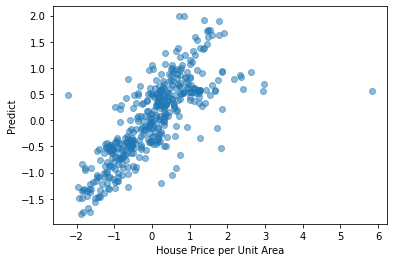

In [74]:
plt.scatter(target, pred2, alpha = 0.5);
plt.xlabel('House Price per Unit Area');
plt.ylabel('Predict');

I don't really see a significant visible improvement from that of our simple linear regressional model predictions...